Decision Tree Classifier Report:
              precision    recall  f1-score   support

           0       0.59      0.61      0.60       147
           1       0.72      0.64      0.68       154
           2       0.90      0.96      0.93       151
           3       0.78      0.82      0.80       166
           4       0.45      0.48      0.46       141
           5       0.62      0.71      0.66       150
           6       0.69      0.67      0.68       144
           7       0.53      0.43      0.48       150

    accuracy                           0.67      1203
   macro avg       0.66      0.66      0.66      1203
weighted avg       0.66      0.67      0.66      1203

Confusion Matrix:
 [[ 89   5   6  18  13   8   2   6]
 [ 19  99   1   7  11   6   4   7]
 [  2   0 145   4   0   0   0   0]
 [ 16   5   5 136   1   2   1   0]
 [  8  17   2   3  67  20   8  16]
 [  2   3   1   3  14 106  10  11]
 [  5   0   1   0  12  13  96  17]
 [  9   9   0   3  31  15  18  65]]

Random Forest C

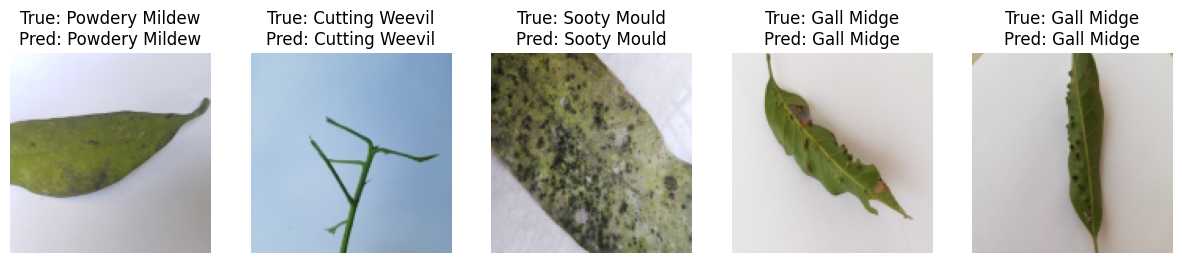

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

# Set the dataset path
dataset_path = '/content/drive/MyDrive/MangoLeafBD Dataset'

# Load and preprocess the data
def load_images_labels(dataset_path, image_size=(128, 128)):
    images = []
    labels = []
    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                image = imread(img_path)
                image = resize(image, image_size, anti_aliasing=True)
                images.append(image.flatten())  # Flatten the image
                labels.append(folder)  # Folder name as label
    return np.array(images), np.array(labels)

# Load dataset
X, y = load_images_labels(dataset_path)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# Evaluation
print("Decision Tree Classifier Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

print("\nRandom Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Plot sample predictions
def plot_sample_predictions(X, y_true, y_pred, n=5):
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    indices = np.random.choice(range(len(X)), n, replace=False)
    for i, idx in enumerate(indices):
        ax = axes[i]
        ax.imshow(X[idx].reshape(128, 128, 3))
        ax.set_title(f"True: {label_encoder.inverse_transform([y_true[idx]])[0]}\nPred: {label_encoder.inverse_transform([y_pred[idx]])[0]}")
        ax.axis('off')
    plt.show()

plot_sample_predictions(X_test, y_test, y_pred_rf)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Description:
               Class  Number of Images
0          Die Back               500
1       Anthracnose               500
2  Bacterial Canker               500
3       Sooty Mould               500
4           Healthy               500
5        Gall Midge               500
6    Cutting Weevil               510
7    Powdery Mildew               500


<ipython-input-7-5bb33e0728cc>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=class_counts_df, x='Class', y='Number of Images', palette='viridis')


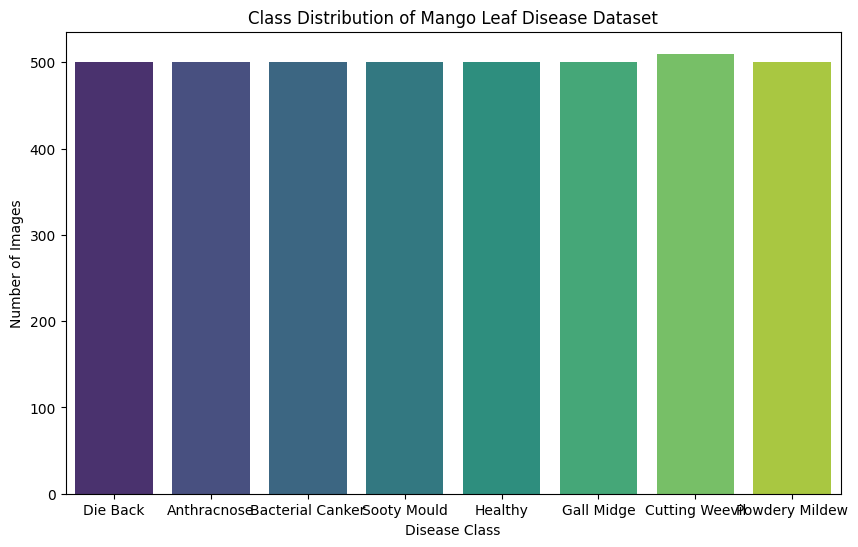


Accuracy Comparison:
Decision Tree Accuracy: 0.6542
Random Forest Accuracy: 0.8720


<ipython-input-7-5bb33e0728cc>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Decision Tree', 'Random Forest'], y=[dt_accuracy, rf_accuracy], palette='pastel')


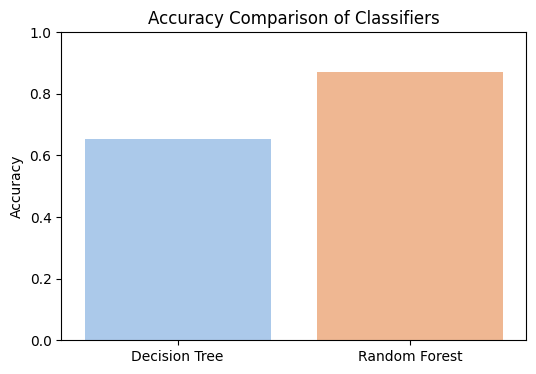

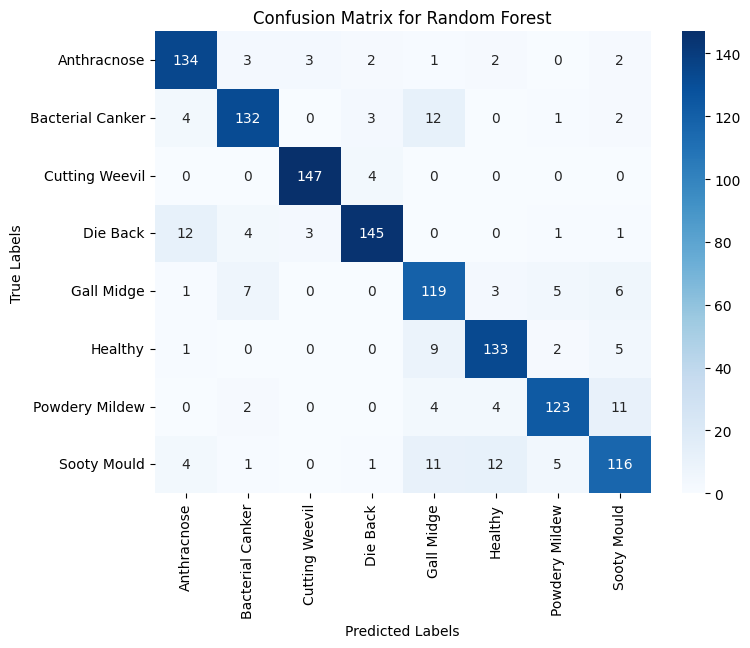

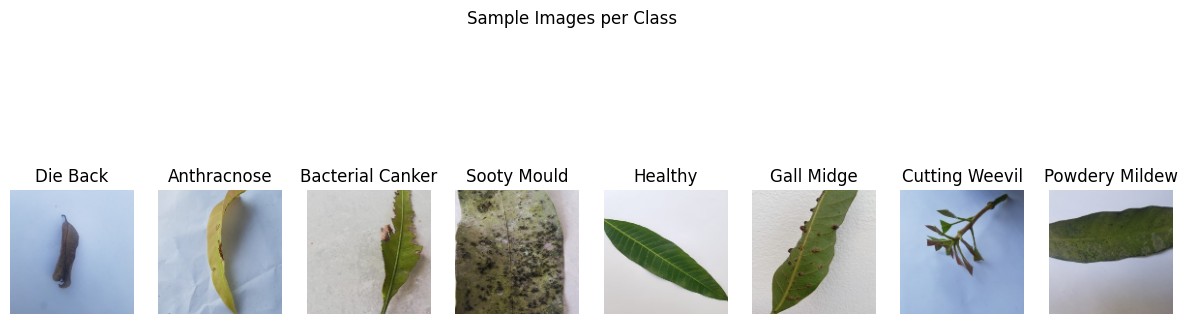


Summary of EDA Findings:
1. Dataset contains multiple classes of mango leaf diseases, with varying image counts per class.
2. Random Forest achieves higher accuracy than Decision Tree.
3. Confusion matrix shows classification performance per class with Random Forest.


In [ ]:
# Import necessary libraries for EDA
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score
import glob

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the dataset path
dataset_path = '/content/drive/MyDrive/MangoLeafBD Dataset'

# EDA: Dataset Description
def describe_dataset(dataset_path):
    class_counts = {}
    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        if os.path.isdir(folder_path):
            num_files = len(os.listdir(folder_path))
            class_counts[folder] = num_files
    class_counts_df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Number of Images'])
    return class_counts_df

# Display class distribution
class_counts_df = describe_dataset(dataset_path)
print("Dataset Description:\n", class_counts_df)

# Plot class distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=class_counts_df, x='Class', y='Number of Images', palette='viridis')
plt.title("Class Distribution of Mango Leaf Disease Dataset")
plt.xlabel("Disease Class")
plt.ylabel("Number of Images")
plt.show()

# Load and preprocess the data
def load_images_labels(dataset_path, image_size=(128, 128)):
    images = []
    labels = []
    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        if os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                img_path = os.path.join(folder_path, filename)
                image = cv2.imread(img_path)
                image = cv2.resize(image, image_size)
                images.append(image.flatten())  # Flatten the image
                labels.append(folder)  # Folder name as label
    return np.array(images), np.array(labels)

# Load dataset
X, y = load_images_labels(dataset_path)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Accuracy Comparison
print("\nAccuracy Comparison:")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Plot accuracy comparison
plt.figure(figsize=(6, 4))
sns.barplot(x=['Decision Tree', 'Random Forest'], y=[dt_accuracy, rf_accuracy], palette='pastel')
plt.title("Accuracy Comparison of Classifiers")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# Confusion Matrix for Random Forest (example)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Display sample images per class
def show_sample_images_per_class(dataset_path, image_size=(128, 128)):
    fig, axes = plt.subplots(1, len(os.listdir(dataset_path)), figsize=(15, 5))
    fig.suptitle("Sample Images per Class")
    for i, folder in enumerate(os.listdir(dataset_path)):
        folder_path = os.path.join(dataset_path, folder)
        sample_img_path = os.path.join(folder_path, os.listdir(folder_path)[0])
        sample_img = cv2.imread(sample_img_path)
        sample_img = cv2.resize(sample_img, image_size)
        axes[i].imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
        axes[i].set_title(folder)
        axes[i].axis('off')
    plt.show()

show_sample_images_per_class(dataset_path)

# Summary of EDA Findings
print("\nSummary of EDA Findings:")
print("1. Dataset contains multiple classes of mango leaf diseases, with varying image counts per class.")
print("2. Random Forest achieves higher accuracy than Decision Tree.")
print("3. Confusion matrix shows classification performance per class with Random Forest.")
